2024-12-03 14:04:49.995661: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 14:04:50.043372: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-03 14:04:50.044375: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-03 14:04:51.408269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-12-03 14:04:59.393183: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/5
781/782 [============================>.] - ETA: 0s - loss: 1.6227 - accuracy: 0.4209

2024-12-03 14:05:20.836464: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


782/782 [==============================] - 20s 23ms/step - loss: 1.6226 - accuracy: 0.4210 - val_loss: 1.3712 - val_accuracy: 0.5070
Epoch 2/5
782/782 [==============================] - 18s 23ms/step - loss: 1.2996 - accuracy: 0.5408 - val_loss: 1.2015 - val_accuracy: 0.5787
Epoch 3/5
782/782 [==============================] - 18s 24ms/step - loss: 1.1652 - accuracy: 0.5916 - val_loss: 1.1241 - val_accuracy: 0.6096
Epoch 4/5
782/782 [==============================] - 18s 23ms/step - loss: 1.0829 - accuracy: 0.6218 - val_loss: 1.0859 - val_accuracy: 0.6187
Epoch 5/5
782/782 [==============================] - 19s 24ms/step - loss: 1.0227 - accuracy: 0.6433 - val_loss: 1.0623 - val_accuracy: 0.6277


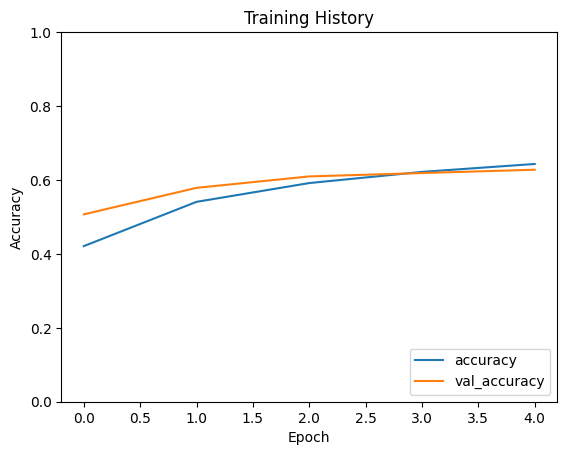

 21/313 [=>............................] - ETA: 1s - loss: 1.0184 - accuracy: 0.6176

2024-12-03 14:06:35.858064: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 5ms/step - loss: 1.0623 - accuracy: 0.6277
Test Accuracy: 0.6276999711990356


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a simplified CNN model for CIFAR-10
def create_simplified_cnn(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape),  # Smaller kernel and filters
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and train the model
model = create_simplified_cnn(input_shape=(32, 32, 3), num_classes=10)
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=64)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title("Training History")
plt.show()

# Evaluate on CIFAR-10 test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')
